<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# Load the data with comma separation and no header
email_rec = pd.read_csv(r'/content/Spam.csv', sep=',', header=None)

# Print the DataFrame
email_rec.head(5)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [14]:
email_rec.columns=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over",
"word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
"word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
"word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
"word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
"word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415",
"word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
"word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu",
"word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
"char_freq_$", "char_freq_hash", "capital_run_length_average", "capital_run_length_longest",
"capital_run_length_total", "spam"]
# renaming the columns]
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
# Print the dimensions of the DataFrame
print("Dimensions of the DataFrame:", email_rec.shape)


Dimensions of the DataFrame: (4601, 58)


In [16]:

email_rec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [17]:
email_rec.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [18]:
email_rec['spam'].value_counts()*100/email_rec.shape[0]

0    60.595523
1    39.404477
Name: spam, dtype: float64

In [19]:
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [20]:
X = email_rec.drop('spam', axis=1)
y = email_rec.spam.values.astype('int')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'spam' is the target variable and the remaining columns are features


# Use StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=4)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3220, 57)
Shape of X_test: (1381, 57)
Shape of y_train: (3220,)
Shape of y_test: (1381,)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = SVC(C=1)
model.fit(X_train,y_train)
y_pred  = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9283128167994207

Confusion Matrix:
 [[811  38]
 [ 61 471]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [26]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

# Creating a KFold object with 5 splits, shuffle=True, and random_state=4
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Instantiating an SVC model with cost=1 and random_state=4
model = SVC(C=1, random_state=4)

# Computing the cross-validation scores
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy')

# Print 5 accuracies obtained from the 5 folds
print("Accuracies from 5 folds:", cv_results)

# Print mean accuracy of all 5 folds
print("Mean Accuracy:", cv_results.mean())


Accuracies from 5 folds: [0.91770186 0.94099379 0.92080745 0.93012422 0.93944099]
Mean Accuracy: 0.9298136645962731


In [28]:
from sklearn.model_selection import GridSearchCV

# Specify range of parameters (C) as a list ([0.1, 1, 10, 100, 1000])
params = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize SVC()
model = SVC()

# Set up grid search scheme (using the 5-fold CV scheme set up earlier)
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=folds, return_train_score=True, verbose=1)

# Fit the model on the training data (it will fit 5 folds across all values of C)
model_cv.fit(X_train, y_train)

# Convert results of grid search CV into a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Print cv_results
cv_results


Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.318223,0.092727,0.096315,0.046168,0.1,{'C': 0.1},0.895963,0.902174,0.906832,0.902174,...,0.905280,0.007795,5,0.912655,0.911879,0.912267,0.911102,0.906056,0.910792,0.002423
1,0.232005,0.041088,0.084414,0.006557,1,{'C': 1},0.917702,0.940994,0.920807,0.930124,...,0.929814,0.009440,2,0.951475,0.946040,0.949922,0.946040,0.945652,0.947826,0.002401
2,0.189989,0.030012,0.050715,0.013237,10,{'C': 10},0.908385,0.944099,0.933230,0.928571,...,0.930745,0.012368,1,0.975543,0.970885,0.973991,0.968944,0.971273,0.972127,0.002347
3,0.184290,0.015038,0.035982,0.007146,100,{'C': 100},0.913043,0.927019,0.936335,0.930124,...,0.928571,0.008562,3,0.989519,0.989907,0.989907,0.988354,0.987966,0.989130,0.000814
4,0.254192,0.037632,0.028446,0.002140,1000,{'C': 1000},0.908385,0.931677,0.922360,0.919255,...,0.920497,0.007440,4,0.996118,0.993789,0.994177,0.993789,0.994177,0.994410,0.000872


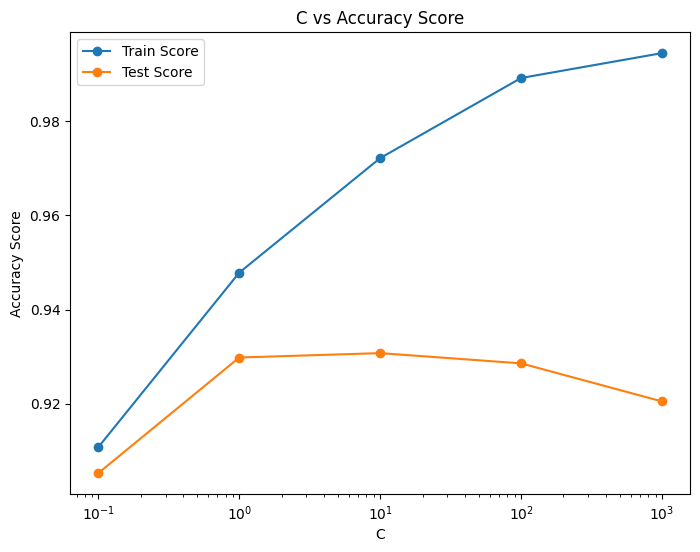

In [29]:
import matplotlib.pyplot as plt

# Plot of C versus train and test scores
plt.figure(figsize=(8, 6))

# Plot train scores
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train Score', marker='o')

# Plot test scores
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test Score', marker='o')

# Add labels and title
plt.xlabel('C')
plt.ylabel('Accuracy Score')
plt.title('C vs Accuracy Score')
plt.xscale('log')  # Use log scale for better visualization if C values span multiple orders of magnitude

# Add legend
plt.legend()

# Show the plot
plt.show()


In [30]:
# Get the best score from the grid search
best_score = model_cv.best_score_

# Get the best value of C
best_C = model_cv.best_params_['C']

# Print the best score and best C
print("The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

# Model with the best value of C
best_model = SVC(C=best_C)

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rbf1 = best_model.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf1))


The highest test accuracy is 0.9307453416149067 at C = 10
Confusion Matrix:
 [[810  39]
 [ 57 475]]


In [31]:
from sklearn.model_selection import GridSearchCV

# Specify params with C as list [0.1, 1, 10, 100, 1000]
params = {'C': [0.1, 1, 10, 100, 1000]}

# Specify scores/metrics in an iterable (e.g., ['accuracy', 'precision', 'recall'])
scores = ['accuracy', 'precision', 'recall']

# Iterate through scores
for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))

    # Set up GridSearch for score metric with estimator, params, cv, scoring as score, and return_train_score=True
    clf = GridSearchCV(estimator=SVC(), param_grid=params, cv=folds, scoring=score, return_train_score=True)

    # Fit model on training data
    clf.fit(X_train, y_train)

    # Print the results
    print("The highest {} score is {} at C = {}".format(score, clf.best_score_, clf.best_params_))
    print("\n")


# Tuning hyper-parameters for accuracy
The highest accuracy score is 0.9307453416149067 at C = {'C': 10}


# Tuning hyper-parameters for precision
The highest precision score is 0.9373311086391073 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
The highest recall score is 0.8987270122310326 at C = {'C': 10}




In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Get list of all available kernels in SVM
kernels = ['Polynomial', 'RBF', 'Sigmoid', 'Linear']

# A function which returns the corresponding SVC model for different kernels
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernel
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernel
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernel
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernel
        return SVC(kernel='linear', gamma="auto")

# Iterate in the range of 4
for i in range(4):
    # Use getClassifier() function for different ith value to get SVC model using different kernel
    svclassifier = getClassifier(i)

    # Fit the model
    svclassifier.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = svclassifier.predict(X_test)

    # Check which kernel is used as per kernels list
    kernel_used = kernels[i]
    print("Kernel Used:", kernel_used)

    # Evaluate our model using classification_report
    print(classification_report(y_test, y_pred))
    print("\n")



Kernel Used: Polynomial
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       849
           1       0.91      0.20      0.33       532

    accuracy                           0.69      1381
   macro avg       0.79      0.60      0.56      1381
weighted avg       0.76      0.69      0.62      1381



Kernel Used: RBF
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



Kernel Used: Sigmoid
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       849
           1       0.86      0.87      0.86       532

    accuracy                           0.90      1381
   macro avg       0.89      0.89      0.89      1381
weighted

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define values for C, gamma, and kernel
C_values = [0.1, 1, 10, 100]
gamma_values = [1, 0.1, 0.01, 0.001]
kernel_values = ['rbf', 'poly', 'sigmoid']

# Create a dictionary param_grid for C, gamma, and kernel values
param_grid = {'C': C_values, 'gamma': gamma_values, 'kernel': kernel_values}

# Initialize GridSearchCV with SVC(), param_grid, refit=True, verbose=2, and return_train_score=True
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=2, return_train_score=True)

# Fit Gridsearch on X_train and y_train
grid.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, verbose=2)

In [36]:
import pandas as pd

# Convert cv_results into a DataFrame
cv_results = pd.DataFrame(grid.cv_results_)

# Print cv_results
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.886197,0.449591,0.349035,0.163963,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.602484,0.605590,...,0.604037,0.001389,46,0.605978,0.609472,0.605590,0.605590,0.606366,0.606599,0.001465
1,0.280317,0.069389,0.016609,0.000422,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.913043,0.905280,...,0.911491,0.009870,10,0.995730,0.996118,0.994565,0.995342,0.995730,0.995497,0.000527
2,0.215360,0.043360,0.039548,0.002412,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.810559,0.832298,...,0.805590,0.018977,31,0.803571,0.802795,0.771351,0.807842,0.772516,0.791615,0.016166
3,0.463198,0.081184,0.163233,0.037572,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.798137,0.809006,...,0.802484,0.009938,34,0.823758,0.823758,0.817158,0.832686,0.823758,0.824224,0.004943
4,0.222582,0.003588,0.031857,0.001216,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.869565,0.869565,...,0.873913,0.007440,23,0.917314,0.919643,0.914596,0.916925,0.920807,0.917857,0.002177
5,0.235844,0.005794,0.042507,0.000584,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.849379,0.850932,...,0.856522,0.008368,27,0.853261,0.848602,0.854037,0.845109,0.852873,0.850776,0.003407
6,0.241244,0.004968,0.081694,0.000821,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.908385,0.886646,...,0.903106,0.008425,14,0.904891,0.906832,0.909550,0.908385,0.908385,0.907609,0.001610
7,0.456953,0.085079,0.084908,0.013430,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.622671,0.627329,...,0.631988,0.006804,43,0.637811,0.637422,0.636258,0.636258,0.631599,0.635870,0.002223
8,0.325780,0.056764,0.068640,0.011070,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.874224,0.880435,...,0.879193,0.007820,21,0.879658,0.877717,0.882376,0.886646,0.883929,0.882065,0.003138
9,0.344779,0.005433,0.120801,0.001887,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.785714,0.768634,...,0.784161,0.008947,36,0.785326,0.786491,0.788043,0.790761,0.787655,0.787655,0.001821
